In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-sales/superstore_final_dataset (1).csv


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
## Read csv
csv = r'/kaggle/input/superstore-sales/superstore_final_dataset (1).csv'

data = pd.read_csv (csv, encoding='iso-8859-1')
store = data.copy()
store.head(10)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680
5,6,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


## Exploratory Data Analyst

In [29]:
# Checking for missing values
store.isna().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

In [30]:
#Postal code has 11 missing values. Can drop along with other unnecessary columns.
store.drop(columns=["Postal_Code","Customer_ID","Row_ID"],axis=1,inplace=True)

In [31]:
store.head(10)

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country,City,State,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,CA-2017-152156,8/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/6/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680
5,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


In [32]:
#Re-calculate missing values
store.isnull().sum()

Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
dtype: int64

In [33]:
store["Sales"].astype(int)


0       261
1       731
2        14
3       957
4        22
       ... 
9795      3
9796     10
9797    235
9798     26
9799     10
Name: Sales, Length: 9800, dtype: int64

[Text(0.5, 1.0, 'Sales by Region')]

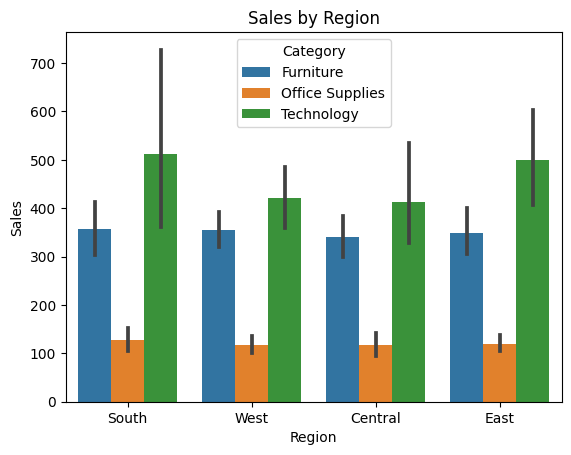

In [34]:
#Convert Sales to Int to be able to graph
sns.barplot(data=store, x="Region",y="Sales",hue="Category").set(title="Sales by Region")

In [35]:
#Pivot Table for Graph
pd.pivot_table(store, values='Sales',index='Region',aggfunc=np.sum).style.format('${0:,.2f}')

,Sales
Region,
Central,"$492,646.91"
East,"$669,518.73"
South,"$389,151.46"
West,"$710,219.68"


<Axes: title={'center': 'Sales by Sub Category'}, xlabel='Sub_Category', ylabel='Sales'>

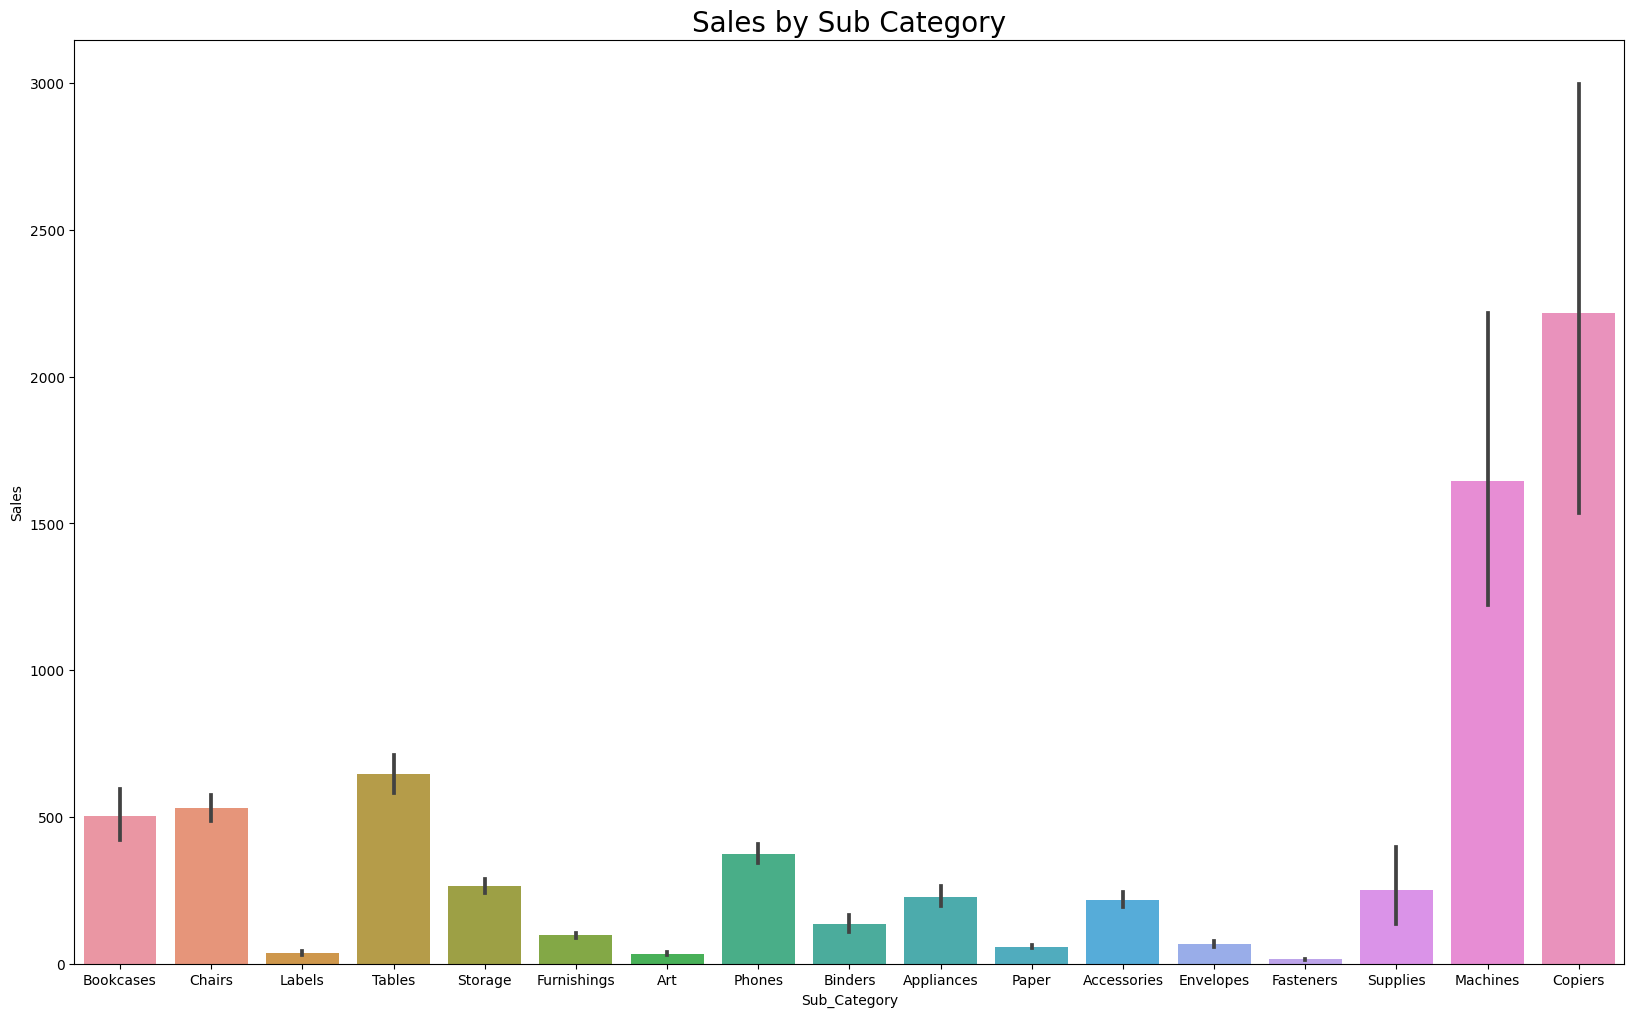

In [36]:
#Lets see highest Sub_Category


#Chart settings
plt.figure(figsize=(20,12))
plt.title("Sales by Sub Category",fontsize= 20)

#Plot Lines
sns.barplot(data=store, x="Sub_Category", y="Sales")

In [37]:
# Sub Category Pivot Table
pd.pivot_table(store, values='Sales',index='Sub_Category',aggfunc=np.sum).style.format('${0:,.2f}')

,Sales
Sub_Category,
Accessories,"$164,186.70"
Appliances,"$104,618.40"
Art,"$26,705.41"
Binders,"$200,028.79"
Bookcases,"$113,813.20"
Chairs,"$322,822.73"
Copiers,"$146,248.09"
Envelopes,"$16,128.05"
Fasteners,"$3,001.96"


In [38]:
#Now let export CSV into an Excel File and load into Tableau
store.to_excel('output.xlsx', index=False)